In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
X = np.array([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
              [1, 1, 2, 1, 3, 0, 5, 10, 1, 2],
              [500, 700, 750, 600, 1450,
               800, 1500, 2000, 450, 1000],
              [1, 1, 2, 1, 2, 
               1, 3, 3, 1, 2]], dtype = np.float64)
y = np.array([0, 0, 1, 0, 1, 0, 1, 0, 1, 1], dtype = np.float64)

In [3]:
def calc_std_feat(x):
  res = (x - x.mean()) / x.std()
  return res

In [4]:
X_st = X.copy()
X_st[2, :] = calc_std_feat(X[2, :])

In [5]:
def calc_logloss(y, y_pred):
  err = - np.mean(y * np.log(y_pred) + (1.0 - y) * np.log(1.0 - y_pred))
  err = np.sum(err)
  return err

In [6]:
# Пример применения
y1 = np.array([1, 0])
y_pred1 = np.array([0.9, 0.1])
calc_logloss(y1, y_pred1)

0.10536051565782628

In [7]:
def sigmoid(z):
  res = 1 / (1 + np.exp(-z))
  return res

In [8]:
z = np.linspace(-10, 10, 101)

In [9]:
probabilities = sigmoid(z)

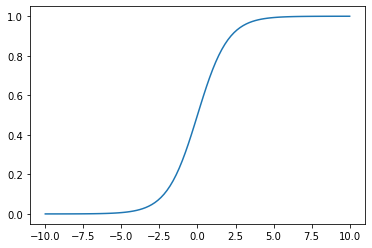

In [10]:
plt.plot(z, probabilities)

In [11]:
### Logistic Regression

In [12]:
def eval_model(X, y, iterations, alpha=1e-4):
  np.random.seed(42)
  W = np.random.randn(X.shape[0])
  n = X.shape[1]
  for i in range(1, iterations+1):
    z = np.dot(W, X)
    y_pred = sigmoid(z)
    err = calc_logloss(y, y_pred)
    W -= alpha * (1/n * np.dot((y_pred - y), X.T))
    if i % (iterations / 10) == 0:
      print(i, W, err)
  return W

In [13]:
W = eval_model(X_st, y, iterations=1000, alpha=1e-4)

100 [ 0.49282748 -0.15007528  0.64748973  1.51727915] 1.2014814214705334
200 [ 0.48896219 -0.16184918  0.64728128  1.51155738] 1.1828456288538924
300 [ 0.48511874 -0.17358386  0.64706349  1.50586552] 1.1643525542846556
400 [ 0.4812976  -0.18527698  0.64683669  1.50020462] 1.1460086359433084
500 [ 0.47749927 -0.19692597  0.64660127  1.4945758 ] 1.127820879406358
600 [ 0.47372426 -0.20852799  0.6463577   1.48898028] 1.109796908143704
700 [ 0.46997312 -0.22007992  0.6461065   1.48341934] 1.0919450148769096
800 [ 0.46624642 -0.23157833  0.64584825  1.47789438] 1.074274212586137
900 [ 0.46254476 -0.24301946  0.64558365  1.4724069 ] 1.0567942835649755
1000 [ 0.45886878 -0.25439917  0.64531344  1.46695851] 1.0395158244739489


In [14]:
from sklearn.linear_model import LogisticRegression as LR

## Домашнее задание

1. \* Измените функцию calc_logloss так, чтобы нули по возможности не попадали в np.log.  

In [15]:
def calc_logloss(y, y_pred):
  y_pred = np.array(list(map(lambda x: 1e-10 if x == 0 else (1 - 1e-10) if x == 1 else x, y_pred)))
  err = - np.mean(y * np.log(y_pred) + (1.0 - y) * np.log(1.0 - y_pred))
  err = np.sum(err)
  return err

2. Подберите аргументы функции eval_model для логистической регрессии таким образом, чтобы log loss был минимальным.

In [16]:
W = eval_model(X_st, y, iterations=32000, alpha=1000)

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  


3200 [-6126.61234177  -817.61275881 -1356.98495986  5489.04902499] 8.015893287893269e-08
6400 [-6126.43802771  -817.43844475 -1357.17369046  5489.22333905] 3.8748452388874476e-08
9600 [-6126.33818402  -817.33860107 -1357.28179165  5489.32318273] 2.5559179997885143e-08
12800 [-6126.26791375  -817.26833079 -1357.35787359  5489.39345301] 1.9073836012403097e-08
16000 [-6126.21364355  -817.2140606  -1357.41663217  5489.4477232 ] 1.521688278422012e-08
19200 [-6126.16942169  -817.16983873 -1357.46451137  5489.49194507] 1.265968788380854e-08
22400 [-6126.13210214  -817.13251918 -1357.50491742  5489.52926462] 1.0839977910070402e-08
25600 [-6126.0998183   -817.10023534 -1357.53987128  5489.56154846] 9.478925912234583e-09
28800 [-6126.07137133  -817.07178838 -1357.57067093  5489.58999542] 8.422531790292511e-09
32000 [-6126.04594535  -817.04636239 -1357.59819975  5489.61542141] 7.578799372473084e-09


увеличивая alpha, можно уменьшать logloss

3. Создайте функцию calc_pred_proba, возвращающую предсказанную вероятность класса 1 (на вход подаются W, который уже посчитан функцией eval_model и X, на выходе - массив y_pred_proba).

In [17]:
def calc_pred_proba(W, X):
    p = 1/(1 + np.e**(np.dot(-W, X)))
    _p = 1 - p
    pred_proba = np.array(list((zip(_p, p))))
    return pred_proba

In [18]:
y_pred_proba = calc_pred_proba(W, X_st)
y_pred_proba

array([[1.00000000e+000, 2.12104211e-054],
       [1.00000000e+000, 1.38643853e-297],
       [0.00000000e+000, 1.00000000e+000],
       [1.00000000e+000, 5.42281707e-176],
       [0.00000000e+000, 1.00000000e+000],
       [1.00000000e+000, 2.44513548e-064],
       [0.00000000e+000, 1.00000000e+000],
       [1.00000000e+000, 1.29573150e-303],
       [7.53856196e-008, 9.99999925e-001],
       [0.00000000e+000, 1.00000000e+000]])

4. Создайте функцию calc_pred, возвращающую предсказанный класс (на вход подаются W, который уже посчитан функцией eval_model и X, на выходе - массив y_pred).

In [19]:
## Параметр t отвечает за степень уверенности

def calc_pred(W, X, t=0.5):
    p = 1/(1 + np.e**(np.dot(-W, X)))
    pred = np.array(list(map(lambda x: 0 if x < t else 1, p)))
    return pred

In [20]:
y_pred = calc_pred(W, X_st)
y_pred

array([0, 0, 1, 0, 1, 0, 1, 0, 1, 1])

5. Посчитайте Accuracy, матрицу ошибок, точность и полноту, а также F1 score.

In [21]:
def calc_conf_matrix(y_pred, y):
    conf_matrix = np.array([[0] * len(set(y)) for i in range(len(set(y)))])
    for pred, exp in zip(y_pred, y):
        conf_matrix[int(pred)][int(exp)] += 1
    return conf_matrix

In [22]:
conf_matrix = calc_conf_matrix(y_pred, y)
conf_matrix

array([[5, 0],
       [0, 5]])

In [23]:
def calc_accuracy(y_pred, y):
    accuracy = np.sum([y_pred[i] == y[i] for i in range(len(y))]) / len(y)
    return accuracy

In [24]:
accuracy = calc_accuracy(y_pred, y)
accuracy

1.0

In [25]:
def calc_recall_precision(conf_matrix):
    recall = conf_matrix[0][0] / np.sum(conf_matrix[:, 0])
    precision = conf_matrix[0][0] / np.sum(conf_matrix[0, :])
    return recall, precision

In [26]:
recall, precision = calc_recall_precision(conf_matrix)
print(recall, precision)

1.0 1.0


In [27]:
def calc_f1(recall, precision):
    f1_score = 2 * (precision * recall) / (precision + recall)
    return f1_score

In [28]:
f1_score = calc_f1(recall, precision)
f1_score

1.0

6. Могла ли модель переобучиться? Почему?

На мой взгляд, мы не можем сейчас достоверно судить о переобучении. У нас не было разделения на тренировочные и тестовые датасеты, мы обучили модель на полном наборе данных, минимизировав функцию ошибки, т. е. наша модель сейчас максимально идеально подстраивается под все существующие измерения. Есть вероятность того, что модель переобучена и на другой выборке даст плохие ответы, но так же возможен случай, что наши классы действительно хорошо разделяются по некоторым признакам

In [29]:
import pandas as pd
import seaborn as sns

In [30]:
df = pd.DataFrame(X_st.T, columns=['X1', 'X2', 'X3', 'X4'])
y_s = pd.DataFrame(y.T, columns=['y'])
df = pd.merge(df, y_s, left_index=True, right_index=True)

In [31]:
df

,X1,X2,X3,X4,y
0,1.0,1.0,-0.979590,1.0,0.0
1,1.0,1.0,-0.567131,1.0,0.0
2,1.0,2.0,-0.464016,2.0,1.0
3,1.0,1.0,-0.773360,1.0,0.0
4,1.0,3.0,0.979590,2.0,1.0
5,1.0,0.0,-0.360901,1.0,0.0
6,1.0,5.0,1.082704,3.0,1.0
7,1.0,10.0,2.113851,3.0,0.0
8,1.0,1.0,-1.082704,1.0,1.0
9,1.0,2.0,0.051557,2.0,1.0


/usr/local/lib/python3.7/site-packages/seaborn/axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


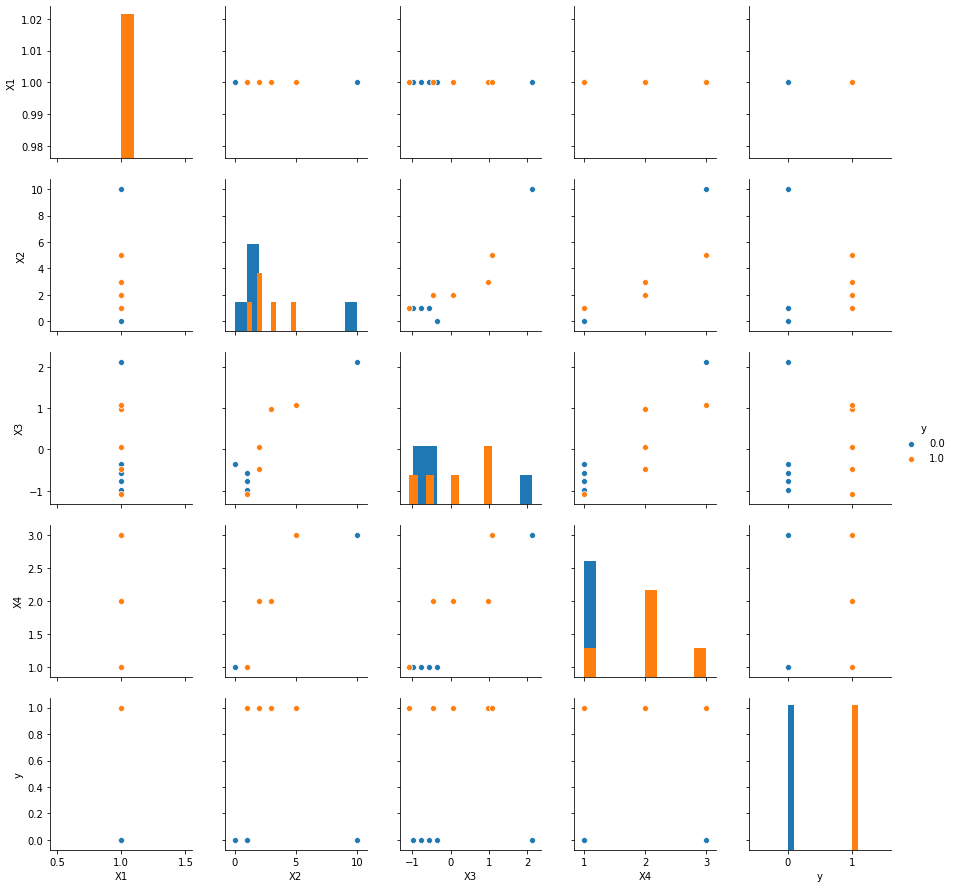

In [32]:
sns.pairplot(df, hue='y', size=2.5, diag_kind='hist');

Надеялся увидеть какую-то линейную зависимость, по которой, можно хорошо разделить измерения на два класса, но в таком формате ее не видно. Простраство признаков имеет размерность 4, а такой график, к сожалению, построить невозможно =) Ну, и так как пока не видно простой зависимости, существует подозрение на то, что модель все-таки переобучилась. Об этом также свидетельствуют большие коэффициенты W.

7*. Создайте функции eval_model_l1 и eval_model_l2 с применением L1 и L2 регуляризаций соответственно.

In [33]:
def eval_model_l1(X, y, iterations, alpha=1e-4, lambda_=1e-4):
  np.random.seed(42)
  W = np.random.randn(X.shape[0])
  n = X.shape[1]
  for i in range(1, iterations+1):
    z = np.dot(W, X)
    y_pred = sigmoid(z)
    err = calc_logloss(y, y_pred)
    W -= alpha * (1/n * np.dot((y_pred - y), X.T) + lambda_ * np.sum(W))
    if i % (iterations / 10) == 0:
      print(i, W, err)
  return W

In [34]:
W = eval_model_l1(X_st, y, iterations=1000, alpha=1e-4, lambda_=1)

100 [ 0.46816532 -0.1747131   0.62278706  1.49262901] 1.1490244694096314
200 [ 0.44087922 -0.20981669  0.59903629  1.46352809] 1.081190516164646
300 [ 0.41481233 -0.24358176  0.57639507  1.43569434] 1.0173961273267798
400 [ 0.38992374 -0.27599802  0.55482702  1.40910105] 0.9578095254068743
500 [ 0.36617511 -0.30703512  0.53430088  1.38372812] 0.9026755291870805
600 [ 0.34353037 -0.33664169  0.51479052  1.3595621 ] 0.8523022229168337
700 [ 0.32195504 -0.3647486   0.49627398  1.33659475] 0.8070209607961116
800 [ 0.30141498 -0.39127845  0.47873133  1.31481993] 0.7671166192806614
900 [ 0.28187479 -0.4161609   0.46214138  1.29422873] 0.7327410567745166
1000 [ 0.26329614 -0.43935055  0.44647814  1.2748042 ] 0.703840625807475


In [35]:
def eval_model_l2(X, y, iterations, alpha=1e-4, lambda_=1e-4):
  np.random.seed(42)
  W = np.random.randn(X.shape[0])
  n = X.shape[1]
  for i in range(1, iterations+1):
    z = np.dot(W, X)
    y_pred = sigmoid(z)
    err = calc_logloss(y, y_pred)
    W -= alpha * (1/n * np.dot((y_pred - y), X.T) + lambda_ * np.sign(W))
    if i % (iterations / 10) == 0:
      print(i, W, err)
  return W

In [36]:
W = eval_model_l2(X_st, y, iterations=1000, alpha=1e-4, lambda_=1)

100 [ 0.48282922 -0.14007519  0.63748889  1.50728106] 1.2034428404664224
200 [ 0.46896925 -0.1418491   0.62727782  1.49156506] 1.186804374743046
300 [ 0.45513476 -0.14358446  0.61705544  1.47588284] 1.170323525359191
400 [ 0.44132629 -0.1452796   0.6068219   1.46023541] 1.1540051134685418
500 [ 0.42754439 -0.14693276  0.59657736  1.44462384] 1.137854148428063
600 [ 0.41378963 -0.14854206  0.58632202  1.42904922] 1.1218758318987856
700 [ 0.40006256 -0.15010554  0.57605611  1.4135127 ] 1.1060755609517616
800 [ 0.38636378 -0.15162112  0.56577988  1.39801547] 1.0904589299511014
900 [ 0.37269389 -0.1530866   0.5554936   1.38255874] 1.0750317309612871
1000 [ 0.3590535  -0.15449968  0.5451976   1.3671438 ] 1.0597999524019825
